# Download Dataset

In [1]:
# Uncomment these to download the dataset
# mkdir("../dataset")
# cd("../dataset") do
#     run(`wget http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip`) 
#     run(`unzip mini_speech_commands.zip`)
# end
using Markdown

Markdown.parse_file("../dataset/mini_speech_commands/README.md")

# Speech Commands dataset excerpt

This is a small excerpt of the [Speech Commands Dataset](https://ai.googleblog.com/2017/08/launching-speech-commands-dataset.html) for use in a tutorial on tensorflow.org. Please refer to the original [dataset](http://download.tensorflow.org/data/speech*commands*v0.01.tar.gz](http://download.tensorflow.org/data/speech*commands*v0.01.tar.gz) for documentation and license information."""


In [22]:
# The Evaliable Commands
commands = [c for c=readdir("../dataset/mini_speech_commands") if c!="README.md"]

8-element Vector{String}:
 "down"
 "go"
 "left"
 "no"
 "right"
 "stop"
 "up"
 "yes"

In [3]:
# Gather file pathes
using Glob
using Random
filenames = glob("../dataset/mini_speech_commands/*/*") |> shuffle
num_examples = length(readdir("../dataset/mini_speech_commands/$(commands[1])"))
println("Number of total examples: ",length(filenames))
println("Number of examples per label: ", num_examples)
println("Example File Tensor: ", filenames[1])

Number of total examples: 8000
Number of examples per label: 1000
Example File Tensor: ..\dataset\mini_speech_commands\down\e14a99a5_nohash_0.wav


In [26]:
# Separate the data set in training data, validation data and test data

train_files = filenames[1:6400]
val_files = filenames[6401:7200]
test_files = filenames[7201:8000]

println("Training set size: ", length(train_files))
println("Validation set size: ", length(val_files))
println("Test set size: ", length(test_files))

Training set size: 6400
Validation set size: 800
Test set size: 800


In [4]:
# Check loading WAVs
using WAV
test_audio, fs = wavread("../dataset/mini_speech_commands/down/0a9f9af7_nohash_0.wav")
@show fs
@show size(test_audio)

fs = 16000.0f0
size(test_audio) = (13654, 1)


(13654, 1)

In [5]:
# Function to load WAVs
function decode_audio(audio_binary)
    audio, fs = wavread(audio_binary)
    audio[:,1]
end
decode_audio("../dataset/mini_speech_commands/down/0a9f9af7_nohash_0.wav")

13654-element Vector{Float64}:
 0.0017700735496078372
 0.002990813928647725
 0.002838221381267739
 0.003021332438123722
 0.0024719992675557726
 0.003143406476027711
 0.0027466658528397473
 0.0019531846064638203
 0.0020142216254158147
 0.0019226660969878231
 0.0018005920590838343
 0.001098666341135899
 0.0018311105685598315
 ⋮
 0.016907254249702446
 0.01913510544145024
 0.020264290292062136
 0.020477919858394117
 0.020020142216254158
 0.020264290292062136
 0.021698660237434005
 0.023102511673329874
 0.025818659016693626
 0.025269325846125675
 0.029725028229621267
 0.017761772515030368

In [6]:
# Function to get command label
function get_label(file_path)
    split(file_path,"\\")[end-1] # For Windows System otherwise replace with /
end
get_label(filenames[1])

"down"

In [7]:
# Function to get WAV with Label
get_waveform_and_label(file_path) = begin
   # @show file_path
    decode_audio(file_path), get_label(file_path)
end

get_waveform_and_label(filenames[1])


([9.155552842799158e-5, 0.00012207403790398877, 0.00012207403790398877, 0.00012207403790398877, 0.00012207403790398877, 9.155552842799158e-5, 9.155552842799158e-5, 9.155552842799158e-5, 9.155552842799158e-5, 9.155552842799158e-5  …  9.155552842799158e-5, 9.155552842799158e-5, 9.155552842799158e-5, 0.00018311105685598315, 0.00021362956633198035, 0.00027466658528397473, 0.00027466658528397473, 0.00024414807580797754, 0.00027466658528397473, 0.00018311105685598315], "down")

In [6]:
#train_ds = [get_waveform_and_label(f) for f=train_files]
# Load some waveforms for checking
# waveform_ds = get_waveform_and_label.(val_files)
using NPZ

function load_tf_waveform_dump(path,num)
    waveforms = [
        npzread("$(path)_waveform_$i.npy")
        for i=0:(num-1)
    ]
    labels = open(f->split(strip(read(f,String)),"\n"),"$(path)_waveform_labels.txt")
    labels = strip.(labels)
    @assert length(labels)==num
    (waveforms, labels)
end

train_wf_x, train_wf_y = load_tf_waveform_dump("../dataset/TF/train",6400)
val_wf_x, val_wf_y = load_tf_waveform_dump("../dataset/TF/val",800)
test_wf_x, test_wf_y = load_tf_waveform_dump("../dataset/TF/test",800)

(Vector{Float32}[[3.0517578f-5, -3.0517578f-5, -6.1035156f-5, -3.0517578f-5, -6.1035156f-5, -9.1552734f-5, -0.00012207031, -9.1552734f-5, -3.0517578f-5, 0.0  …  0.0, 0.0, 0.0, 3.0517578f-5, 3.0517578f-5, 0.00018310547, 0.00021362305, 0.00024414062, 0.00018310547, 0.00021362305], [0.0, 6.1035156f-5, 0.0, 0.0, -3.0517578f-5, 3.0517578f-5, 9.1552734f-5, 3.0517578f-5, 0.0, -3.0517578f-5  …  -0.0024108887, -0.002380371, -0.0022583008, -0.0022583008, -0.002166748, -0.0020751953, -0.0020751953, -0.0020141602, -0.0020141602, -0.0019836426], [-0.0009765625, -0.001953125, -0.0016784668, -0.0017089844, -0.0018615723, -0.0015869141, -0.0017700195, -0.0017700195, -0.0016479492, -0.001739502  …  0.0012817383, 0.00024414062, 0.00045776367, 0.0018615723, 0.00039672852, -0.0005187988, 0.00039672852, 9.1552734f-5, 0.00018310547, -0.0018310547], [3.0517578f-5, -3.0517578f-5, 3.0517578f-5, 0.00045776367, 0.000579834, 0.00048828125, 0.00061035156, 0.00045776367, 0.00088500977, 0.0015563965  …  0.0011291504

In [10]:
using Plots

rows = 3
cols = 3

n = rows*cols

figs = [
    plot(
        (1:length(train_wf_x[i]))./1e3, train_wf_x[i],
        title = train_wf_y[i],
        yticks = -1.2:0.4:1.2,
        ylim = (-1.3,1.3),
        xticks = 0:5:15,
        legend=false,
    )
    for i=1:n
]

plot(
    figs...,
    layout=(rows,cols),
    size=(600,800),
)

In [26]:
# Compute spectragrams (with stft)
# Compared to tf function the spectrogram from DSP.stft is transposed

using DSP

function get_spectrogram(waveform)
    input_len = 16000
    waveform = length(waveform) >= input_len ? 
                    waveform[1:input_len]    :
                    [convert.(Float32,waveform);zeros(Float32,input_len - length(waveform))]
    spectrogram = DSP.stft(
        waveform,
        255,
        255-128, 
        window=hanning,
        #fs=fs,
    ) |> x->abs.(x)
    spectrogram'
end

get_spectrogram(train_wf_x[1])

124×129 adjoint(::Matrix{Float32}) with eltype Float32:
 0.292866   0.214522   0.0419538  0.0551857  …  4.59729f-5   2.05636f-5
 0.297658   0.31289    0.130304   0.0673779     8.37869f-5   0.000119299
 0.312299   0.400402   0.345421   0.1467        0.000111571  6.95884f-6
 0.201796   0.102854   0.117494   0.0891156     9.18924f-5   7.75829f-5
 0.145658   0.353582   0.272757   0.0268534     2.12681f-5   2.47508f-5
 0.0523557  0.233495   0.155128   0.150278   …  9.81264f-5   2.15434f-5
 0.17868    0.495027   0.454037   0.227491      4.60903f-5   1.47745f-5
 0.0224285  0.161299   0.193748   0.244458      2.94013f-5   7.92742f-6
 0.0103105  0.435804   0.527697   0.307071      6.48408f-5   4.79892f-5
 0.0939893  0.15305    0.218997   0.112424      3.6806f-5    4.66667f-5
 0.0372796  0.42618    0.316786   0.0838709  …  2.6501f-5    4.78327f-6
 0.107731   0.267375   0.170548   0.219613      0.000215715  0.000291701
 0.21428    0.457988   0.368863   0.14354       7.82718f-5   4.26173f-6
 ⋮    

In [18]:
using WAV
wavplay(train_wf_x[1],16000f0)

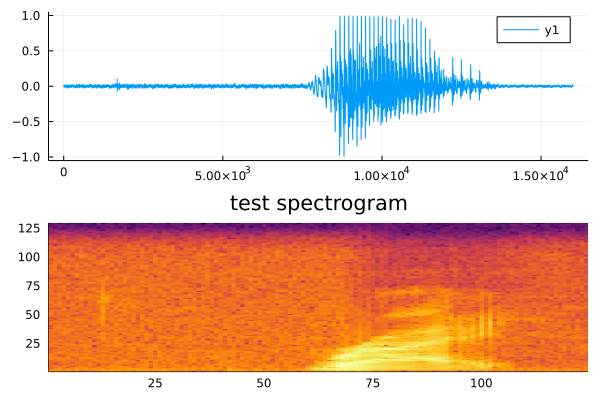

In [20]:
# Function to plot spectrograms
# I was too lazy to fix the xticks of the spectrogram

function plot_spectrogram(spectrogram, title)
    tmp = similar(spectrogram)
    if (length(size(spectrogram))>2)
        @assert length(size(spectrogram)) == 3
        tmp = spectrogram[:,:,1]
    else
        tmp = spectrogram
    end
    log_spec = log.(tmp .+ eps(Float32))
    heatmap(log_spec', legend=false, title=title)
end


# tst_waveform = decode_audio("../dataset/mini_speech_commands/down/0a9f9af7_nohash_0.wav")
# tst_spectrogram = get_spectrogram(tst_waveform)
tst_spectrogram= get_spectrogram(train_wf_x[1])

p1 = plot(train_wf_x[1])
p2 = plot_spectrogram(tst_spectrogram, "test spectrogram")

plot(p1,p2, layout=(2,1))

size(x) = (124, 129, 1)
commands = ["down", "go", "left", "no", "right", "stop", "up", "yes"]


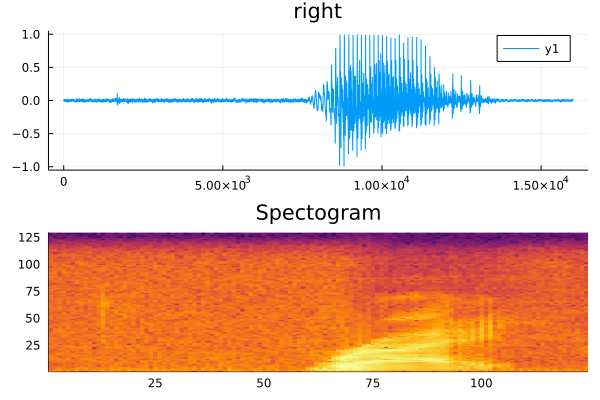

Bool[0, 0, 0, 0, 1, 0, 0, 0]


In [28]:
using Flux

# Function to get spectrogram label pairs
# Deviation from TF - I store labels in onehot format
function my_spectrogram(waveform)
    spectrogram = convert.(Float32,get_spectrogram(waveform))
    reshape(spectrogram,size(spectrogram)...,1)
end

get_label_id(label) = Flux.onehot(label,commands)


# Check the function
#x,y = get_spectrogram(train_wf_x[1]), get_label_id(train_wf_y[1])
x = my_spectrogram(train_wf_x[1])
y = get_label_id(train_wf_y[1])

p1 = plot(train_wf_x[1],title="$(train_wf_y[1])")
@show size(x)
p2 = plot_spectrogram(x, "Spectogram")
@show commands
plot(p1, p2, layout=(2,1)) |> display
println(y)

In [30]:
spectrogram_ds = get_spectrogram.(train_wf_x)
spectrogram_id = get_label_id.(train_wf_y)

6400-element Vector{Flux.OneHotArray{UInt32, 8, 0, 1, UInt32}}:
 [0, 0, 0, 0, 1, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 1, 0]
 [0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 1, 0]
 [0, 0, 0, 0, 0, 1, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 1, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 1, 0]
 [0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1]
 [0, 0, 0, 0, 0, 1, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 1, 0]
 [1, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0]

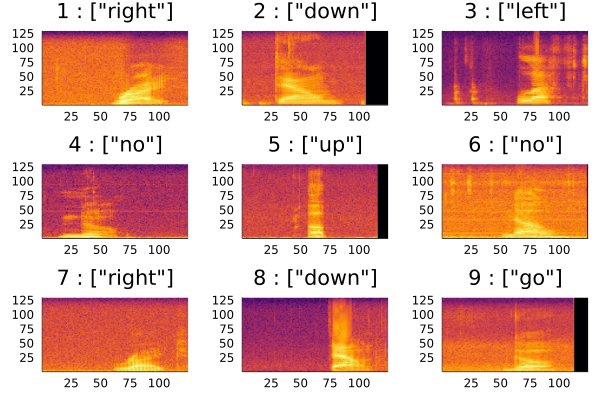

In [31]:
rows = 3
cols = 3
n = rows*cols

figs = [
    plot_spectrogram(spectrogram_ds[i][:,:,1,1],"$i : $(commands[spectrogram_id[i]])")
    for i=1:n
]

plot(figs...,layout=(rows,cols))

In [32]:
for i=1:9
    wavplay(train_wf_x[i],16000f0)
end

In [70]:
# Function to prepare all data needed for training, validation and testing
function preprocess_dataset(files)
    files_ds = [get_waveform_and_label(f) for f=files]
    get_spectrogram_and_label_id.(files_ds)
end

function preprocess_dataset_from_tf(path, num)
    wf_x, wf_y = load_tf_waveform_dump(path, num)
    x = my_spectrogram.(wf_x)
    y = get_label_id.(wf_y)
    if (length(x)<=3200)
        x = cat(x...,dims=4)
    else
        x1 = cat(x[1:3200]...,dims=4)
        x2 = cat(x[3201:end]...,dims=4)
        x = [x1;;;;x2;;;;]
    end
    x , cat(y...,dims=2)
end

val_ds_x, val_ds_y = preprocess_dataset_from_tf("../dataset/TF/val", 800)
val_ds_x

124×129×1×800 Array{Float32, 4}:
[:, :, 1, 1] =
 0.000648889  0.000321967  0.000230948  …  5.04665f-5   1.75525f-6
 0.000299027  0.000519433  0.000474779     5.89984f-5   0.000100566
 0.00165483   0.0011998    0.000605134     3.2649f-5    1.75485f-5
 0.00141844   0.000674613  0.000104737     4.82376f-5   2.37522f-5
 0.000565601  0.000351216  9.52456f-5      9.4173f-5    0.00013594
 0.000374025  0.000307293  0.00013798   …  3.66215f-5   0.000156904
 6.25391f-5   0.000139884  0.000217707     6.09858f-5   2.30237f-5
 0.000201165  0.000167163  0.00017026      8.07001f-5   5.66543f-5
 2.69161f-5   0.000106045  0.000163827     1.29724f-5   1.21256f-5
 1.11199f-5   0.000106365  0.000151332     1.48988f-5   3.33806f-5
 2.44251f-5   1.11143f-5   1.53425f-5   …  1.70396f-5   3.63092f-6
 1.56499f-5   2.38174f-5   4.51122f-5      3.1022f-5    8.9407f-6
 0.000111967  0.00012236   0.000124925     4.45952f-5   1.89188f-6
 ⋮                                      ⋱               
 0.000444544  0.0009187

In [71]:
# Prepare Data
# train_ds = preprocess_dataset(train_files)
# val_ds = preprocess_dataset(val_files)
# test_ds = preprocess_dataset(test_files)
train_ds_x, train_ds_y = preprocess_dataset_from_tf("../dataset/TF/train",6400)
val_ds_x, val_ds_y = preprocess_dataset_from_tf("../dataset/TF/val", 800)
test_ds_x, test_ds_y = preprocess_dataset_from_tf("../dataset/TF/test", 800);

In [72]:
@show size(train_ds_x)
@show size(train_ds_y)

size(train_ds_x) = (124, 129, 1, 6400)
size(train_ds_y) = (8, 6400)


(8, 6400)

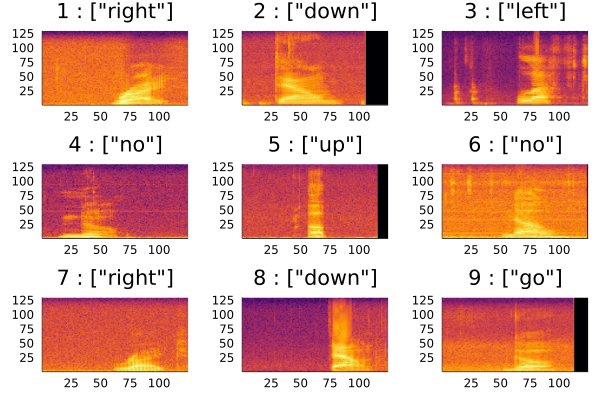

In [76]:
# Check data
rows = 3
cols = 3
n = rows*cols

figs = [
    plot_spectrogram(train_ds_x[:,:,1,i],"$i : $(commands[train_ds_y[:,i]])")
    for i=1:n
]

plot(figs...,layout=(rows,cols))

In [77]:
# Finally use the DataLoader

trainingData = Flux.DataLoader((train_ds_x, train_ds_y), batchsize=64,shuffle=true)
valData = Flux.DataLoader((val_ds_x, val_ds_y), batchsize=64)

MLUtils.DataLoader{Tuple{Array{Float32, 4}, Flux.OneHotArray{UInt32, 8, 1, 2, Vector{UInt32}}}, Random._GLOBAL_RNG, Val{nothing}}(([0.00064888934 0.00032196695 … 5.0466508f-5 1.755252f-6; 0.0002990273 0.000519433 … 5.899839f-5 0.00010056574; … ; 0.00092841685 0.0006906196 … 0.000111042486 0.00015360117; 7.9072546f-5 0.00019361533 … 6.0393315f-5 4.200684f-5;;;; 3.00531f-5 3.0053097f-5 … 3.0053097f-5 3.00531f-5; 0.00012447179 0.00022025133 … 5.457325f-6 1.9190193f-6; … ; 2.9731082f-5 7.3467956f-5 … 1.39357635f-5 1.5241914f-5; 6.027351f-5 6.765856f-5 … 1.6666838f-5 3.6470738f-6;;;; 0.00030693196 0.0005429347 … 0.00022585038 5.127309f-5; 0.0012826163 0.0009355911 … 8.8337976f-5 2.3313041f-5; … ; 0.0015440637 0.00088917394 … 3.813329f-6 7.6131546f-6; 0.0020174088 0.0008253683 … 7.668266f-5 0.000105332816;;;; … ;;;; 8.157403 4.140987 … 8.4340216f-5 2.861023f-6; 8.132449 4.115931 … 5.0115243f-5 0.00015735626; … ; 8.082223 4.078062 … 0.00014507864 0.0001449585; 8.124115 4.0991206 … 0.000172133

In [78]:
# ds_mean = sum(train_ds_x) / prod(size(train_ds_x))
# ds_sqrt_var = sqrt(sum((train_ds_x .- ds_mean).^2) / prod(size(train_ds_x)))
using Statistics
# Compute mean 
ds_mean =  mean(train_ds_x)
ds_sqrt_var = sqrt(var(train_ds_x))

0.766143f0

In [79]:
# Model Definition

model = Chain(
    Upsample(:bilinear,size=(32,32)),
    x->(x .- ds_mean) ./ ds_sqrt_var,
    Conv((3,3),1=>32, Flux.relu),
    Conv((3,3),32=>64, Flux.relu),
    MaxPool((2,2)),
    Dropout(0.25),
    Flux.flatten,
    Dense(12544=>128,relu),
    Dropout(0.5),
    Dense(128=>length(commands)),
)
# Checking 
model(train_ds_x[:,:,1:1,1:2])

8×2 Matrix{Float32}:
  0.896975    0.236136
 -0.254591   -0.162845
 -0.370674   -0.253718
  0.0940633   0.0831212
  0.337003    0.0934687
 -0.353257   -0.101784
  0.406873    0.209266
 -0.417858   -0.0228133

In [80]:
# Loss Function
function loss(x,y)
    ŷ = model(x)
    Flux.Losses.logitcrossentropy(ŷ,y)
end

# Check Accuracy
function getAccuracy(m,d)
    acc = 0
    for (x,y)=d
        ŷ = model(x)
        acc += sum(Flux.onecold(ŷ) .== Flux.onecold(y)) / size(x)[end]
    end
    acc/length(d)
end

# Total Loss
function loss_tot(d)
    l = 0
    for (x,y) = d
        l+= loss(x,y)
    end
    return l/length(d)
end

loss_tot (generic function with 1 method)

In [81]:
# Goes very slow :''(
@show loss_tot(valData) 
@show getAccuracy(model,valData)

loss_tot(valData) = 2.113806f0
getAccuracy(model, valData) = 0.12139423076923077


0.12139423076923077

In [82]:
opt = Flux.Optimise.ADAM()
ps = Flux.params(model)
testmode!(model,false)

evalcb() = println("Loss: $(loss_tot(valData))")

Flux.@epochs 10 Flux.train!(
    loss,
    ps,
    trainingData,
    opt,
    cb=Flux.throttle(evalcb,10),
)

@show getAccuracy(model,valData)

┌ Info: Epoch 1
└ @ Main C:\Users\detter55\.julia\packages\Flux\js6mP\src\optimise\train.jl:154


Loss: 2.1387079
Loss: 1.8881942
Loss: 1.6119684
Loss: 1.4549272


┌ Info: Epoch 2
└ @ Main C:\Users\detter55\.julia\packages\Flux\js6mP\src\optimise\train.jl:154


Loss: 1.3273408
Loss: 1.2489444
Loss: 1.1261692
Loss: 1.0215443


┌ Info: Epoch 3
└ @ Main C:\Users\detter55\.julia\packages\Flux\js6mP\src\optimise\train.jl:154


Loss: 1.019974
Loss: 0.98361456
Loss: 0.96139157
Loss: 0.9350973


┌ Info: Epoch 4
└ @ Main C:\Users\detter55\.julia\packages\Flux\js6mP\src\optimise\train.jl:154


Loss: 0.908953
Loss: 0.86399215
Loss: 0.84200126
Loss: 0.8542658


┌ Info: Epoch 5
└ @ Main C:\Users\detter55\.julia\packages\Flux\js6mP\src\optimise\train.jl:154


Loss: 0.8490865
Loss: 0.75154555
Loss: 0.79808754
Loss: 0.7859271


┌ Info: Epoch 6
└ @ Main C:\Users\detter55\.julia\packages\Flux\js6mP\src\optimise\train.jl:154


Loss: 0.73201275
Loss: 0.777463
Loss: 0.7360709
Loss: 0.6961635


┌ Info: Epoch 7
└ @ Main C:\Users\detter55\.julia\packages\Flux\js6mP\src\optimise\train.jl:154


Loss: 0.70347697
Loss: 0.713871
Loss: 0.7060863
Loss: 0.7357229


┌ Info: Epoch 8
└ @ Main C:\Users\detter55\.julia\packages\Flux\js6mP\src\optimise\train.jl:154


Loss: 0.6622995
Loss: 0.6663872
Loss: 0.68952984
Loss: 0.6191698


┌ Info: Epoch 9
└ @ Main C:\Users\detter55\.julia\packages\Flux\js6mP\src\optimise\train.jl:154


Loss: 0.6457416
Loss: 0.6850765
Loss: 0.70541024
Loss: 0.6900105


┌ Info: Epoch 10
└ @ Main C:\Users\detter55\.julia\packages\Flux\js6mP\src\optimise\train.jl:154


Loss: 0.6571265
Loss: 0.6777251
Loss: 0.65588737
Loss: 0.6496553
getAccuracy(model, valData) = 0.7932692307692307


0.7932692307692307

In [84]:
testmode!(model,true)
@show getAccuracy(model,valData)

getAccuracy(model, valData) = 0.8521634615384616


0.8521634615384616

In [ ]:
using Flux, Plots
x = reshape(convert.(Float32,1:124*129), 124,129,1,1)
y = upsample_bilinear(x,size=(32,32))

fig1 = heatmap(x[:,:,1,1])
fig2 = heatmap(y[:,:,1,1])
plot(fig1,fig2, layout=(1,2))